In [7]:
import requests
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("badmatr11x/roberta-base-emotions-detection-from-text")
model = AutoModelForSequenceClassification.from_pretrained("badmatr11x/roberta-base-emotions-detection-from-text")

# Function to predict emotion
def predict_emotion(text):
    # Tokenize the input text and convert to tensor
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")

    # Predict
    with torch.no_grad():
        logits = model(**inputs).logits

    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(logits, dim=1)

    # Convert probabilities to percentages
    percentages = probabilities[0].tolist()  # Convert the first (and only) batch of probabilities to a list

    # Emotion labels (adjust based on the model's specific output)
    labels = ["joy", "anger", "sadness", "disgust", "surprise", "fear", "neutral"]

    # Create a dictionary of emotion: percentage
    emotion_probabilities = {labels[i]: round(percent * 100, 2) for i, percent in enumerate(percentages)}

    return emotion_probabilities

# Example text
example_text = "I really hope you can convince the judge otherwise I have a problem. This is freaking me out right now"
emotion = predict_emotion(example_text)
print(f"The predicted emotion is: {emotion}")

The predicted emotion is: {'joy': 63.99, 'anger': 6.88, 'sadness': 4.34, 'disgust': 2.41, 'surprise': 10.64, 'fear': 6.27, 'neutral': 5.48}


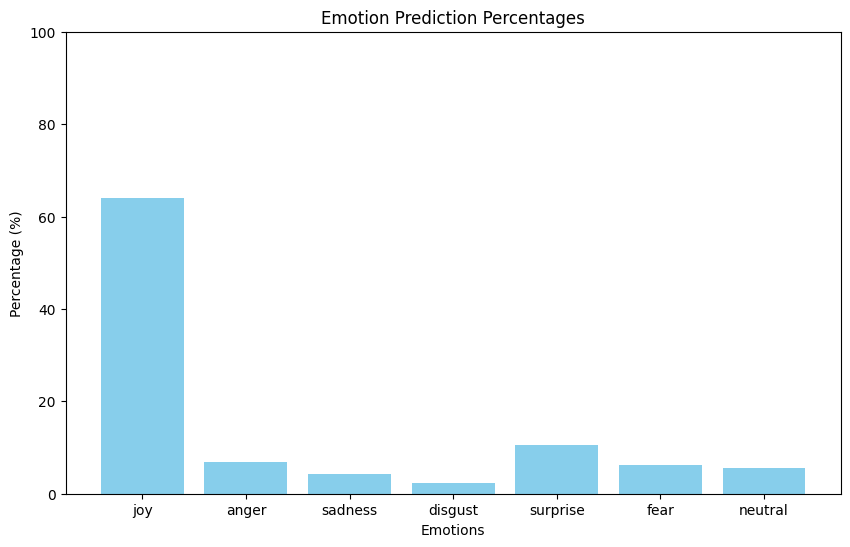

In [8]:
# Extract emotions and their corresponding percentages
import matplotlib.pyplot as plt
emotions = list(emotion.keys())
percentages = list(emotion.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(emotions, percentages, color='skyblue')
plt.xlabel('Emotions')
plt.ylabel('Percentage (%)')
plt.title('Emotion Prediction Percentages')
plt.ylim(0, 100)  # Set y-axis range to 0-100 for percentage representation

# Display the plot
plt.show()